In [6]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../..'))

from PySDM.physics import si
from PySDM.initialisation.spectral_sampling import ConstantMultiplicity
from PySDM.initialisation.spectra import Gamma, Gaussian
from PySDM.physics.formulae import volume
from importlib import reload

In [7]:
import PySDM.dynamics.coalescence.kernels.linear as l

In [8]:
reload(l)

<module 'PySDM.dynamics.coalescence.kernels.linear' from '/home/edejong/.conda/envs/edjPySDM/lib/python3.8/site-packages/PySDM/dynamics/coalescence/kernels/linear.py'>

In [ ]:
# Set desired constants
a      = 8e-7          # 1/s
b      = 1e-6          # cm3/s
dt_sim = 1e-3          # time step
T_sim  = 1             # total time of simulation
n_sd   = 2**14         # number of superdroplets
N0     = 1e5           # total number of droplets
end_step = int(T_sim / dt_sim)
k_shape = 0.0817
theta = 1.5597

# initial distribution
#initial_spectrum = Gamma(norm_factor=N0, k=0.0817, theta= 1.5597)
initial_spectrum = Gaussian(norm_factor=N0, loc=15, scale=5)
attributes = {}
attributes['volume'], attributes['n'] =\
    ConstantMultiplicity(spectrum=initial_spectrum).sample(n_sd)

In [ ]:
from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from K import A_plus_B
from PySDM.backends import CPU
from PySDM.products.state import ParticlesVolumeSpectrum, ParticlesNumberVolumeSpectrum, KthMoment

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=dt_sim, dv=1))
builder.add_dynamic(Coalescence(kernel=Linear(a, b)))
products = [ParticlesVolumeSpectrum(), ParticlesNumberVolumeSpectrum(), KthMoment()]
particles = builder.build(attributes, products)

In [ ]:
from PySDM.dynamics.coalescence import 

## Plot the distribution

98304.0
30086.0
Average final particle size:  49.011500365618836


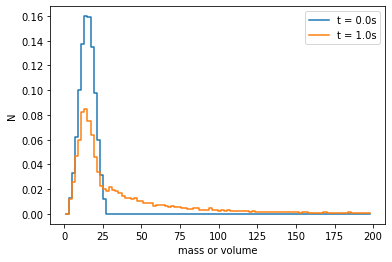

In [6]:
from matplotlib import pyplot
import numpy as np

v_bins_edges = np.linspace((1), (200), num=100)

for step in [0, end_step]:
    particles.run(step - particles.n_steps)
    pyplot.step(x=v_bins_edges[:-1],
                y=particles.products['N(v)'].get(v_bins_edges)/particles.products['Mk'].get(0),
                where='post', label=f"t = {step*dt_sim}s")
    print((particles.products['Mk'].get(0)))

print("Average final particle size: ", particles.products['Mk'].get(1)/particles.products['Mk'].get(0))

pyplot.xlabel('mass or volume')
pyplot.ylabel("N")
pyplot.legend()

## Plot the moments, plus analytic moments

In [7]:
# Plot the moments over time
n_time = 100
from PySDM.products.state import KMoments

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=dt_sim, dv=1))
builder.add_dynamic(Coalescence(kernel=Golovin(b = K)))
products = [KMoments()]
particles = builder.build(attributes, products)

k = 3
tsteps = range(n_time)
Mk = np.zeros((len(tsteps), k))
Mk_norm = np.zeros((len(tsteps), k))

## PySDM solutions
for i, step in enumerate(tsteps):
    step = int(end_step*step/(n_time-1))
    particles.run(step - particles.n_steps)
    Mk[i,:] = (particles.products['M0-Mk'].get(k))
    Mk_norm[i,:] = Mk[i,:] / Mk[0,:]

In [9]:
# Analytic solutions
def golovin_M012_norm_analytic(M_0, t, b):
    M0 = M_0[0]*np.exp(-b*M_0[1]*t)
    M1 = M_0[1]
    M2 = M_0[2]*np.exp(2*b*M_0[1]*t)
    return [M0/M_0[0], M1/M_0[1], M2/M_0[2]]

#M_0 = [N0, N0*k*theta, N0*(k+1)*k*theta**2]
mu = 15
sigma = 5
M_0 = [N0, N0*mu, N0*(mu**2 + sigma**2)]
Mk_norm_analytic = np.zeros((len(tsteps), k))
for i, step in enumerate(tsteps):
    t = T_sim*step/(n_time-1)
    Mk_norm_analytic[i,:] = golovin_M012_norm_analytic(M_0,t,K)

initial moments:  [   98304.          1474560.         24265027.43164101]
final moments:  [3.0436000e+04 1.4745600e+06 2.5309648e+08]


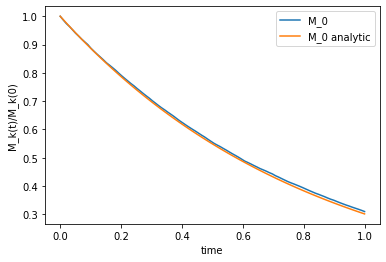

In [10]:
j=0
pyplot.plot([t/(n_time-1)*T_sim for t in tsteps], Mk_norm[:,j], label=f"M_{j}")
pyplot.plot([t/(n_time-1)*T_sim for t in tsteps], Mk_norm_analytic[:,j], label=f"M_{j} analytic")
    
pyplot.xlabel("time")
pyplot.ylabel("M_k(t)/M_k(0)")
pyplot.legend()

print("initial moments: ", Mk[0,:])
print("final moments: ", Mk[-1,:])

initial moments:  [   98304.          1474560.         24265027.43164101]
final moments:  [3.0436000e+04 1.4745600e+06 2.5309648e+08]


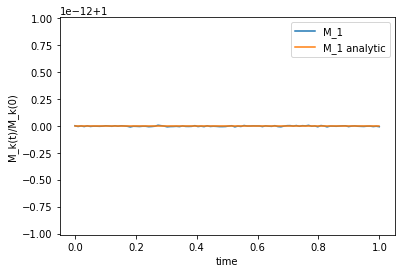

In [11]:
j=1
pyplot.plot([t/(n_time-1)*T_sim for t in tsteps], Mk_norm[:,j], label=f"M_{j}")
pyplot.plot([t/(n_time-1)*T_sim for t in tsteps], Mk_norm_analytic[:,j], label=f"M_{j} analytic")
    
pyplot.xlabel("time")
pyplot.ylabel("M_k(t)/M_k(0)")
pyplot.legend()

print("initial moments: ", Mk[0,:])
print("final moments: ", Mk[-1,:])

initial moments:  [   98304.          1474560.         24265027.43164101]
final moments:  [3.0436000e+04 1.4745600e+06 2.5309648e+08]


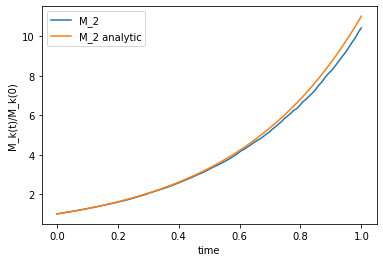

In [12]:
j=2
pyplot.plot([t/(n_time-1)*T_sim for t in tsteps], Mk_norm[:,j], label=f"M_{j}")
pyplot.plot([t/(n_time-1)*T_sim for t in tsteps], Mk_norm_analytic[:,j], label=f"M_{j} analytic")
    
pyplot.xlabel("time")
pyplot.ylabel("M_k(t)/M_k(0)")
pyplot.legend()

print("initial moments: ", Mk[0,:])
print("final moments: ", Mk[-1,:])